In [1]:
#chargement des données d'apprentissage
import pandas
DTrain = pandas.read_excel("diabete_reg_logistique.xlsx", sheet_name = "apprentissage")
#info
print(DTrain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   568 non-null    int64  
 1   plasma     568 non-null    int64  
 2   diastolic  568 non-null    int64  
 3   triceps    568 non-null    int64  
 4   serum      568 non-null    int64  
 5   bodymass   568 non-null    float64
 6   pedigree   568 non-null    float64
 7   age        568 non-null    int64  
 8   alea1      568 non-null    float64
 9   alea2      568 non-null    float64
 10  diabete    568 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 48.9 KB
None


# Nous isolons la variable cible (Y) et les explicatives potentielles (X) dans deux structures distinctes.
Nous comptabilisons les effectifs par classe. Nous avons 372 personnes non atteintes et 196 diabètes
dans notre échantillon.

In [2]:
#y (diabete) est la dernière colonne
yTrain = DTrain.iloc[:,-1]
#X (les autres) sont les variables qui précèdent la dernière
XTrain = DTrain.iloc[:,:-1]
#comptage des modalités de y
print(yTrain.value_counts())

0    372
1    196
Name: diabete, dtype: int64


In [3]:
# Nous réalisons les mêmes étapes sur notre échantillon « test ». Nous chargeons les données

In [4]:
#chargement des données test
DTest = pandas.read_excel("diabete_reg_logistique.xlsx", sheet_name = "test")
#info
print(DTest.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   200 non-null    int64  
 1   plasma     200 non-null    int64  
 2   diastolic  200 non-null    int64  
 3   triceps    200 non-null    int64  
 4   serum      200 non-null    int64  
 5   bodymass   200 non-null    float64
 6   pedigree   200 non-null    float64
 7   age        200 non-null    int64  
 8   alea1      200 non-null    float64
 9   alea2      200 non-null    float64
 10  diabete    200 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 17.3 KB
None


In [5]:
#  puis nous préparons les structures.

In [6]:
#y (diabete) est la dernière colonne
yTest = DTest.iloc[:,-1]
#X (les autres) sont les variables qui précèdent la dernière
XTest = DTest.iloc[:,:-1]
#comptage des modalités de y
print(yTest.value_counts())

0    128
1     72
Name: diabete, dtype: int64


# Régression logistique avec “statsmodels”

In [7]:
#importation de la librairie de calcul
import statsmodels as sm
#vérification de version
print(sm.__version__)

0.12.0


# Modélisation et inspection des résultats

In [8]:
#importation de l'outil
from statsmodels.tools import add_constant
#données X avec la constante
XTrainBis = sm.tools.add_constant(XTrain)
#vérifier la structure
print(XTrainBis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      568 non-null    float64
 1   pregnant   568 non-null    int64  
 2   plasma     568 non-null    int64  
 3   diastolic  568 non-null    int64  
 4   triceps    568 non-null    int64  
 5   serum      568 non-null    int64  
 6   bodymass   568 non-null    float64
 7   pedigree   568 non-null    float64
 8   age        568 non-null    int64  
 9   alea1      568 non-null    float64
 10  alea2      568 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 48.9 KB
None


In [9]:
#visualisation des premières lignes de la structure
#premières lignes
print(XTrainBis.head())

   const  pregnant  plasma  diastolic  triceps  serum  bodymass  pedigree  \
0    1.0         0     138          0        0      0      36.3     0.933   
1    1.0         4     142         86        0      0      44.0     0.645   
2    1.0         3     142         80       15      0      32.4     0.200   
3    1.0         3     113         50       10     85      29.5     0.626   
4    1.0         5      88         78       30      0      27.6     0.258   

   age  alea1  alea2  
0   25  0.338  0.188  
1   22  0.835  0.711  
2   63  0.493  0.845  
3   25  0.857  0.821  
4   37  0.045  0.392  


# Modélisation Logit

In [10]:
#importation de la classe de calcul
from statsmodels.api import Logit
#régression logistique - on passe la cible et les explicatives
lr = Logit(endog=yTrain.astype(float),exog=XTrainBis.astype(float))
#lancer les calculs
#algorithme de Newton-Raphson utilisé par défaut
#https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit.html
res = lr.fit()

Optimization terminated successfully.
         Current function value: 0.476159
         Iterations 6


# Nous affichons ensuite les propriétés de l’objet produit par fit().

In [11]:
#propriétés de l'objet résultat
#https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.LogitResults.html
print(dir(res))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_cache', '_data_attr', '_data_in_cache', '_get_endog_name', '_get_robustcov_results', '_use_t', 'aic', 'bic', 'bse', 'conf_int', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'f_test', 'fittedvalues', 'get_margeff', 'initialize', 'k_constant', 'llf', 'llnull', 'llr', 'llr_pvalue', 'load', 'mle_retvals', 'mle_settings', 'model', 'nobs', 'normalized_cov_params', 'params', 'pred_table', 'predict', 'prsquared', 'pvalues', 'remove_data', 'resid_dev', 'resid_generalized', 'resid_pearson', 'resid_response', 'save', 'scale', 'set_null_options', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'use_t', 'wald_t

# Les résultats détaillés de la régression sont affichés avec la commande summary().

In [12]:
#résumé des résultats
print(res.summary())

                           Logit Regression Results                           
Dep. Variable:                diabete   No. Observations:                  568
Model:                          Logit   Df Residuals:                      557
Method:                           MLE   Df Model:                           10
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.2610
Time:                        20:14:52   Log-Likelihood:                -270.46
converged:                       True   LL-Null:                       -365.99
Covariance Type:            nonrobust   LLR p-value:                 1.179e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1902      0.887     -9.234      0.000      -9.929      -6.452
pregnant       0.0947      0.038      2.467      0.014       0.019       0.170
plasma         0.0322      0.004      7.826      0.0

Les résultats sont tout à fait conformes à ce que l’on pourrait attendre de ce type d’outil. Dans la
partie haute, nous y reviendrons, nous disposons des informations globales sur la modélisation. Dans
la partie basse, nous visualisons les coefficients estimés et les éléments pour l’inférence statistique
(écarts-type estimés des coefficients, statistique de test de significativité, p-value du test de
significativité, intervalle de confiance des coefficients à 95%).

# Important
Des calculs intermédiaires sont possibles relativement simplement. Par exemple, si nous souhaitons
obtenir les intervalles de confiance à 90% des coefficients, nous faisons appel à la méthode
conf_int() de l’objet résultat fourni par fit().


In [13]:
#intervalle de confiance des coefficients à 90%
print(res.conf_int(alpha=0.1))

                  0         1
const     -9.649033 -6.731344
pregnant   0.031583  0.157913
plasma     0.025417  0.038946
diastolic -0.026846 -0.006063
triceps   -0.010009  0.015978
serum     -0.002555  0.000695
bodymass   0.065580  0.123814
pedigree   0.205952  1.377405
age        0.004235  0.041325
alea1     -0.837232  0.388943
alea2     -0.240471  1.003609


# Evaluation globale du modèle en resubstitution

L’évaluation en resubstitution consiste à utiliser les données d’apprentissage même pour mesurer la
qualité du modèle : en termes de performances prédictives, nous savons dans ce cas que les
indicateurs calculés sont souvent trop optimistes ; en termes d’approximation des probabilités
d’appartenance aux classes, ce qui donne lieu à des tests statistiques usuels dans la pratique de la
régression logistique mais peu connus en machine learning.

# Matrice de confusion en resubstitution

La matrice de confusion résulte de la confrontation entre les classes observées (valeurs de la valeur
cible) et estimées à l’aide du modèle (LIVRE, section 2.1). La propriété (.fittedvalues) correspond aux
valeurs du LOGIT (LIVRE, section 1.3) calculées sur les données d’apprentissage.

In [14]:
#valeurs estimées par la régression en resubstitution
print(res.fittedvalues)

0      0.992453
1      0.606054
2      0.265769
3     -1.161582
4     -2.278191
         ...   
563   -0.288489
564   -1.807065
565   -1.622167
566    0.239538
567   -2.377756
Length: 568, dtype: float64


Nous pouvons reproduire ces valeurs à partir des coefficients de la régression et de la description
des observations. Pour le premier individu (n°0) par exemple :

In [15]:
#Voici les coefficients estimés
print(res.params)

const       -8.190188
pregnant     0.094748
plasma       0.032181
diastolic   -0.016455
triceps      0.002984
serum       -0.000930
bodymass     0.094697
pedigree     0.791679
age          0.022780
alea1       -0.224145
alea2        0.381569
dtype: float64


# Description du 1er individu

In [16]:
#voici la description du premier individu
print(XTrainBis.iloc[0,:])

const          1.000
pregnant       0.000
plasma       138.000
diastolic      0.000
triceps        0.000
serum          0.000
bodymass      36.300
pedigree       0.933
age           25.000
alea1          0.338
alea2          0.188
Name: 0, dtype: float64


# Le produit scalaire – valeur du LOGIT pour l’individu n°0

In [17]:
import numpy
print(numpy.sum(res.params*XTrainBis.iloc[0,:]))

0.9924529545060738


Nous pouvons déduire du LOGIT la prédiction en utilisant une règle d’affectation simple.

In [18]:
#la règle d'affectation consiste à confronter le LOGIT à la valeur seuil 0
predResub = numpy.where(res.fittedvalues > 0, 1, 0)
print(predResub)

[1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0
 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0
 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 

Via un tableau croisé entre les classes observées et prédites, nous obtenons la matrice de confusion.

In [19]:
#on peut en déduire la matrice de confusion
print(pandas.crosstab(yTrain,predResub))

col_0      0    1
diabete          
0        329   43
1         84  112


Laquelle peut être obtenue directement via la fonction .pred_table() de l’objet régression.

In [20]:
#matrice de confusion en resubstitution directement fournie par l'outil
print(res.pred_table())

[[329.  43.]
 [ 84. 112.]]


Plusieurs indicateurs peuvent être extraits de cette matrice (LIVRE, section 2.1.1). Nous y
reviendrons plus loin lorsqu’elle sera construite à partir de l’échantillon test. Les valeurs obtenues
seront autrement plus représentatives des performances réelles du modèle.

# Pseudo-R2

Les pseudo-R² sont des indicateurs similaires dans l’esprit au R² de la régression linéaire. Il sont
basés sur la confrontation entre la log-vraisemblance du modèle et de celle du modèle trivial
composé uniquement de la constante (null model)

# R² de McFadden

In [21]:
#accès à la log-vraisemblance du modèle
print("Log-vraisemblance du modèle : %.4f" % (res.llf))
#log-vraisemblance du null modèle
print("Log-vraisemblance du null modèle : %.4f" % (res.llnull))

Log-vraisemblance du modèle : -270.4585
Log-vraisemblance du null modèle : -365.9860


In [22]:
#R2 de McFadden
R2MF = 1 - res.llf / res.llnull
print(R2MF)

0.26101398077836613


In [23]:
#qui est founi directement par l'outil
print(res.prsquared)

0.26101398077836613


# R² de Cox et Snell

In [24]:
#exponenielle de LL_null
L0 = numpy.exp(res.llnull)
#exponentielle de LL_modèle
La = numpy.exp(res.llf)
#taille de l'échantillon
n = DTrain.shape[0]
#R2 de Cox et Snell
R2CS = 1.0 - (L0 / La)**(2.0/n)
print("R2 de Cox - Snell : %.4f" % (R2CS))

R2 de Cox - Snell : 0.2856


# R² de Nagelkerke

In [25]:
#max du R2 de COx-Snell
maxR2CS = 1.0 - (L0)**(2.0/n)
#R2 de Nagelkerke
R2N = R2CS / maxR2CS
print("R2 de Nagelkerke : %.4f" % (R2N))

R2 de Nagelkerke : 0.3943


# Evaluation basée sur les scores

L’évaluation basée sur les scores analyse dans quelle mesure les probabilités d’affectation à la
modalité cible (Y = 1) fournis par le modèle, que l’on nommera « scores » dans ce qui suit, sont de
qualité satisfaisante. Nous pouvons les calculer en appliquant la fonction logistique (.cdf) sur le
LOGIT

In [26]:
#scores fournis par la régression
scores = lr.cdf(res.fittedvalues)
print(scores[:10])

[0.72957215 0.64704005 0.56605385 0.23837986 0.09294535 0.21707393
 0.13273869 0.07248227 0.21364505 0.04597785]


# vérifions la première valeur (individu n°0)

In [27]:
s0 = 1.0/(1.0 + numpy.exp(-1.0 * res.fittedvalues[0]))
print("Score du 1er individu %.4f" % (s0))

Score du 1er individu 0.7296


# Diagramme de fiabilité

Le diagramme de fiabilité est un outil de diagnostic graphique. Il oppose les scores estimés par le
modèle aux « scores observés ». Ces derniers sont obtenus en calculant la proportion des positifs
observés dans des groupes d’observations. Lesquels groupes sont constitués à partir d’un
découpage en intervalles de largeurs égales des probabilités d’affectation

In [28]:
#data frame temporaire avec y et les scores
df = pandas.DataFrame({"y":yTrain,"score":scores})
#5 intervalles de largeur égales
intv = pandas.cut(df.score,bins=5,include_lowest=True)
#intégrées dans le df
df['intv'] = intv
print(df)

     y     score                            intv
0    1  0.729572                  (0.587, 0.781]
1    1  0.647040                  (0.587, 0.781]
2    0  0.566054                  (0.392, 0.587]
3    0  0.238380                  (0.198, 0.392]
4    0  0.092945  (0.0013900000000000002, 0.198]
..  ..       ...                             ...
563  0  0.428374                  (0.392, 0.587]
564  0  0.140993  (0.0013900000000000002, 0.198]
565  0  0.164906  (0.0013900000000000002, 0.198]
566  0  0.559600                  (0.392, 0.587]
567  0  0.084885  (0.0013900000000000002, 0.198]

[568 rows x 3 columns]


A partir de ce dataset, nous pouvons calculer la moyenne des scores estimés dans chaque groupe
délimité par les intervalles.


In [29]:
#moyenne des scores par groupe
m_score = df.pivot_table(index="intv",values="score",aggfunc="mean")
print(m_score)

                                   score
intv                                    
(0.0013900000000000002, 0.198]  0.102093
(0.198, 0.392]                  0.285405
(0.392, 0.587]                  0.476966
(0.587, 0.781]                  0.679209
(0.781, 0.976]                  0.857792


Puis la proportion des observations (scores observés) positives dans les mêmes groupes. 
La variable cible Y étant binaire (0/1), la moyenne fait très bien l’affaire.

In [30]:
#moyenne des y - qui équivaut à une proportion puisque 0/1
m_y = df.pivot_table(index="intv",values="y",aggfunc="mean")
print(m_y)

                                       y
intv                                    
(0.0013900000000000002, 0.198]  0.092511
(0.198, 0.392]                  0.291971
(0.392, 0.587]                  0.539474
(0.587, 0.781]                  0.637681
(0.781, 0.976]                  0.847458


Le diagramme de fiabilité (reliability diagram) est un graphique nuage de points opposant les scores
estimés et observés. S’ils forment une droite, nous pouvons considérer que la modélisation est
pertinente car le modèle arrive à approcher de manière satisfaisante l’appartenance aux classes des
individus.

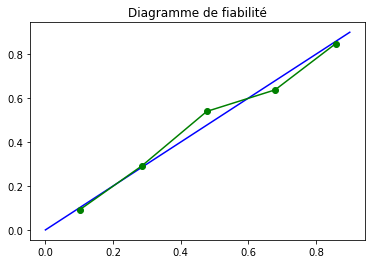

In [31]:
#pouvoir faire apparaître le graphique dans le notebook
%matplotlib inline
#insérer le graphique
import matplotlib.pyplot as plt
#construire la diagonale
plt.plot(numpy.arange(0,1,0.1),numpy.arange(0,1,0.1),'b')
#rajouter notre diagramme
plt.plot(m_score,m_y,"go-")
#titre
plt.title("Diagramme de fiabilité")
#faire apparaître
plt.show()

Pour ce qui est de notre exemple, la modélisation semble relativement intéressante même si nous
notons ici ou là des écarts par rapport à la première bissectrice.

# Test de Hosmer-Lemeshow

Le test de Hosmer-Lemeshow procède de la même idée de confrontation entre scores estimés et
observés. Mais il quantifie les écarts à l’aide d’un indicateur statistique

In [32]:
#data frame temporaire avec y et les scores
df = pandas.DataFrame({"y":yTrain,"score":scores})
#10 intervalles de fréquences égales
intv = pandas.qcut(df.score,q=10)
#intégrées dans le df
df['intv'] = intv
print(df)

     y     score              intv
0    1  0.729572    (0.624, 0.787]
1    1  0.647040    (0.624, 0.787]
2    0  0.566054    (0.458, 0.624]
3    0  0.238380    (0.198, 0.264]
4    0  0.092945  (0.0602, 0.0968]
..  ..       ...               ...
563  0  0.428374    (0.345, 0.458]
564  0  0.140993   (0.0968, 0.142]
565  0  0.164906    (0.142, 0.198]
566  0  0.559600    (0.458, 0.624]
567  0  0.084885  (0.0602, 0.0968]

[568 rows x 3 columns]


A partir de ce tableau, nous pouvons retracer les étapes du calcul de l’indicateur statistique.

# Effectifs par groupe

In [33]:
n_tot = df.pivot_table(index="intv",values="y",aggfunc="count").values[:,0]
print(n_tot)

[57 57 57 56 57 57 56 57 57 57]


# Somme des scores par groupes

In [34]:
s_scores = df.pivot_table(index='intv',values="score",aggfunc="sum").values[:,0]
print(s_scores)

[ 2.02272734  4.56665844  7.0056866   9.57994925 13.44277186 17.2915872
 22.43331173 30.64510151 39.97361233 49.03859374]


# Nombre de positifs par groupe

In [35]:
n_pos = df.pivot_table(index="intv",values="y",aggfunc="sum").values[:,0]
print(n_pos)

[ 3  2  2 14 13 16 28 33 37 48]


# Nombre de négatifs par groupe

In [36]:
n_neg = n_tot - n_pos
print(n_neg)

[54 55 55 42 44 41 28 24 20  9]


Nous nous sommes basés sur l’équation en 2 parties 

In [37]:
C1 = numpy.sum((n_pos - s_scores)**2/s_scores)
print(C1)

9.44729672142736


In [38]:
C2 = numpy.sum((n_neg - (n_tot - s_scores))**2/((n_tot - s_scores)))
print(C2)

2.9000074327988936


# Statistique de Hosmer-Lemeshow

In [39]:
HL = C1 + C2
print(HL)

12.347304154226254


# Laquelle suite une loi du KHI-2 à 8 degrés de liberté

In [40]:
#librairie scipy
import scipy
#probabilité critique
pvalue = 1.0 - scipy.stats.chi2.cdf(HL,8)
print(pvalue)

0.13636768680069833


Au risque 5%, nous ne pouvons pas rejeter l’hypothèse de compatibilité de notre modèle avec les
données.

# Tests de significativité des coefficients

Cette partie reprend la trame du chapitre 3 du LIVRE. Il s’agit de tester la nullité de tout ou partie des
coefficients de la régression. Nous nous appuyons sur les 2 approches qui font référence : le test du
rapport de vraisemblance et le test de Wald.

# Test de significativité globale de la régression

Il s’agit de vérifier si les coefficients, à l’exception de la constante, sont tous simultanément nuls

# a- Via le test du rapport de vraisemblance

Ce test est fondé sur la confrontation des déviances du modèle et du null modèle (modèle trivial
composé exclusivement de la constante). On se rappelle que la déviance est égale à (-2) x logvraisemblance.

In [41]:
#déviance du modèle
dev_modele = (-2) * res.llf
print("Deviance du modèle : %.4f " % (dev_modele))
#déviance du modèle trivial
dev_null = (-2) * res.llnull
print("Deviance du modèle : %.4f " % (dev_null))
#statistique du rapport de vraisemblance
LR_stat = dev_null - dev_modele
print("Stat. du rapport de vraisemblance : %.4f " % (LR_stat))

Deviance du modèle : 540.9170 
Deviance du modèle : 731.9720 
Stat. du rapport de vraisemblance : 191.0549 


In [42]:
#laquelle était fournie directement par l'objet
print("Stat. du rapport de vraisemblance via l'objet résultat : %.4f" % (res.llr))

Stat. du rapport de vraisemblance via l'objet résultat : 191.0549


Notre calcul rejoint la valeur renvoyée par la propriété dédiée de l’objet régression. C’est toujours
rassurant. Le degré de liberté est égal au nombre de paramètres retirés du modèle. Sous l’hypothèse
nulle (tous les coefficients sont simultanément égaux à zéro), la statistique suit une loi du KHI-2.

In [43]:
#degré de liberté du test (nb. de coef. estimés excepté la constante)
print(res.df_model)

10.0


In [44]:
#p-value du test
pvalue = 1.0 - scipy.stats.chi2.cdf(res.llr,res.df_model)
print(pvalue)

0.0


In [45]:
#laquelle était également fournie par l'objet
print(res.llr_pvalue)

1.1793104380832713e-35


Encore une fois, nos calculs concordent avec la valeur de la p-value restituée par l’objet. Au risque
5%, nous pouvons rejeter l’hypothèse de nullité des coefficients.

# b) Via les comparaisons des critères AIC et BIC

In [46]:
#AIC du modèle
print("AIC du modèle : %.4f" % (res.aic))
#AIC du modèle trivial - 1 seul param. estimé, la constante
aic_null = (-2) * res.llnull + 2 * (1)
print("AIC du modèle trivial : %.4f" % (aic_null))

AIC du modèle : 562.9170
AIC du modèle trivial : 733.9720


In [47]:
#BIC du modèle
print("BIC du modèle : %.4f" % (res.bic))
#BIC du modèle trivial - 1 seul param. estimé, la constante
bic_null = (-2) * res.llnull + numpy.log(n) * (1)
print("BIC du modèle trivial : %.4f" % (bic_null))

BIC du modèle : 610.6804
BIC du modèle trivial : 738.3141


# Tester la significativité d’un coefficient

Le test le plus immédiat est celui de Wald. Il suffit de regarder les p-value
associées à chaque variable dans le résumé des résultats. 

En confrontant les résultats de la régression avec et sans la variable incriminée. 

Par exemple, pour évaluer le coefficient associé à la variable “pregnant”. Nous effectuons la régression en l’excluant.

In [48]:
#data frame sans "Sex"
XTrain_wo_pregnant = XTrainBis.drop(columns=['pregnant'])
print(XTrain_wo_pregnant.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      568 non-null    float64
 1   plasma     568 non-null    int64  
 2   diastolic  568 non-null    int64  
 3   triceps    568 non-null    int64  
 4   serum      568 non-null    int64  
 5   bodymass   568 non-null    float64
 6   pedigree   568 non-null    float64
 7   age        568 non-null    int64  
 8   alea1      568 non-null    float64
 9   alea2      568 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 44.5 KB
None


In [49]:
#régression sans Sex
lr_wo_pregnant = Logit(yTrain,XTrain_wo_pregnant)
#résultats
res_wo_pregnant = lr_wo_pregnant.fit()
#affichage
print(res_wo_pregnant.summary())

Optimization terminated successfully.
         Current function value: 0.481626
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                diabete   No. Observations:                  568
Model:                          Logit   Df Residuals:                      558
Method:                           MLE   Df Model:                            9
Date:                Sun, 23 May 2021   Pseudo R-squ.:                  0.2525
Time:                        20:14:55   Log-Likelihood:                -273.56
converged:                       True   LL-Null:                       -365.99
Covariance Type:            nonrobust   LLR p-value:                 4.927e-35
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.2988      0.884     -9.386      0.000     -10.032      -6.566
plasma         0.0320      0.

La statistique de test est obtenue par l’écart entre les déviances

In [50]:
#statistique de test - différence entre les déviances
LR_pregnant = (-2) * res_wo_pregnant.llf - (-2) * res.llf
print(LR_pregnant)

6.210139293948032


Sous H0, le coefficient associé à « pregnant » est nul, elle suit une loi du KHI-2 à 6 (vérifier 1 ou 6 !!!!) degrés de liberté

In [51]:
#degré de liberté = 1 puisqu'un seul coef. retiré
ddl = res_wo_pregnant.df_resid - res.df_resid
print("Degré de liberté du test : %.d" % (ddl))
#p-value
pvalue = 1.0 - scipy.stats.chi2.cdf(LR_pregnant,ddl)
print("Probabilité critique : %.4f" % (pvalue))

Degré de liberté du test : 1
Probabilité critique : 0.0127


Très proche du résultat obtenu avec Wald finalement (en termes de p-value tout du moins). Ce n’est
pas très étonnant. Notre effectif est assez grand. L’approximation normale est d’autant meilleure que
le ratio entre le nombre d’observations et le nombre de variables augmente.

# Tester un groupe de coefficients

# a) Le plus simple, passer par la vraisemblance

L’approche est aisément généralisable au test de significativité de plusieurs coefficients. 

Par exemple, vérifions que les coefficients de (Sex, Education et Occupation) peuvent être considérés
comme simultanément nuls (H0 : a_pregnant = a_pedigree = a_age = 0)

In [52]:
#définir la matrice des X sans les 3 variables
XTrain_wo_3 = XTrainBis.drop(columns=['pregnant','pedigree','age'])
print(XTrain_wo_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      568 non-null    float64
 1   plasma     568 non-null    int64  
 2   diastolic  568 non-null    int64  
 3   triceps    568 non-null    int64  
 4   serum      568 non-null    int64  
 5   bodymass   568 non-null    float64
 6   alea1      568 non-null    float64
 7   alea2      568 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.6 KB
None


# Nous réalisons la régression sans les 3 variables

In [53]:
#régression sans les 3 variables
lr_wo_3 = Logit(yTrain,XTrain_wo_3)
#résultats
res_wo_3 = lr_wo_3.fit()

Optimization terminated successfully.
         Current function value: 0.500100
         Iterations 6


Nous pouvons par la suite réaliser le test en calculant la statistique du rapport de vraisemblance (par
l’écart entre les déviances) et calculer la p-value avec les degrés de liberté idoines.

In [54]:
#statistique de test - différence entre les déviances
LR_3 = (-2) * res_wo_3.llf - (-2) * res.llf
print("Statistique de test : %.4f" % (LR_3))
#degré de liberté = 3 puisque 3 coef. retirés
ddl = res_wo_3.df_resid - res.df_resid
print("Degré de liberté du test : %.d" % (ddl))
#p-value
pvalue = 1.0 - scipy.stats.chi2.cdf(LR_3,ddl)
print("Probabilité critique : %.4f" % (pvalue))

Statistique de test : 27.1966
Degré de liberté du test : 3
Probabilité critique : 0.0000


# Conclusion : 
La nullité simultanée des coefficients de (pregnant, pedigree, age) n’est pas
démentie par les données au risque 5%.


# b) Test de Wald – Calcul matriciel

In [55]:
#afficher la matrice de var-covar des coefs. estimés.
print(res.cov_params())
#récupération sous une forme matricielle
vcov = res.cov_params().values

              const  pregnant    plasma     diastolic   triceps         serum  \
const      0.786618  0.000090 -0.001666 -1.036677e-03 -0.000101  1.319138e-04   
pregnant   0.000090  0.001475  0.000012 -7.363145e-06 -0.000014  1.762133e-06   
plasma    -0.001666  0.000012  0.000017 -2.689255e-06  0.000004 -1.417663e-06   
diastolic -0.001037 -0.000007 -0.000003  3.991344e-05 -0.000008  4.019536e-07   
triceps   -0.000101 -0.000014  0.000004 -7.722340e-06  0.000062 -3.123143e-06   
serum      0.000132  0.000002 -0.000001  4.019536e-07 -0.000003  9.758778e-07   
bodymass  -0.009174  0.000029 -0.000002 -1.938876e-05 -0.000040 -3.804739e-07   
pedigree  -0.068775  0.001217  0.000056 -9.905162e-05 -0.000287 -2.812299e-05   
age       -0.002464 -0.000234 -0.000007 -1.554074e-05  0.000013  1.115616e-07   
alea1     -0.074063 -0.000659 -0.000004 -8.982406e-05  0.000176 -1.295055e-05   
alea2     -0.082810 -0.000128 -0.000012  1.701037e-05 -0.000051  3.317227e-05   

               bodymass  pe

In [56]:
#nous avons bien le carré des ecarts-type estimés sur la diagonale
#à confronter avec les sorties de summary (page 6)
print(numpy.sqrt(numpy.diagonal(vcov)))

[0.8869147  0.03840145 0.00411233 0.00631771 0.00789955 0.00098787
 0.01770192 0.35609645 0.01127448 0.37273084 0.37817354]


# Reproduisons les étapes de notre support pour (H0 : a_pregnant = a_pedigree = a_age = 0)

In [57]:
#indice des coefficients concernés
indices = [1,6,7]
#sous-matrice de var.covar
subset_vcov = numpy.zeros(shape=(3,3))
for i in range(3):
    for j in range(3):
         subset_vcov[i,j] = vcov[indices[i],indices[j]]
#vérification
print(subset_vcov)

[[1.47467137e-03 2.87626523e-05 1.21725235e-03]
 [2.87626523e-05 3.13358088e-04 4.23640655e-04]
 [1.21725235e-03 4.23640655e-04 1.26804685e-01]]


Nous inversions ensuite cette sous-matrice.

In [58]:
#inversion de cette matrice
inv_subset_vcov = numpy.linalg.inv(subset_vcov)
print(inv_subset_vcov)

[[ 684.44802613  -54.18651505   -6.38927779]
 [ -54.18651505 3210.00628009  -10.20412224]
 [  -6.38927779  -10.20412224    7.98156825]]


Nous récupérons le sous-vecteur des coefficients estimés.

In [59]:
#coefficients estimés
a = res.params[indices].values

Reste à calculer la forme quadratique correspondant à la statistique de test et
la probabilité critique associée.

In [60]:
#produit matriciel
stat_3 = numpy.dot(a,numpy.dot(inv_subset_vcov,a))
print("Stat. de test : %.4f" % (stat_3))
#p-value (ddl = 3 puisque 3 coef. à tester)
pvalue = 1.0 - scipy.stats.chi2.cdf(stat_3,3)
print("p-value : %.4f" % (pvalue))

Stat. de test : 36.4719
p-value : 0.0000


Encore une fois, du fait de l’effectif assez élevé, les résultats sont très similaires à ceux du test du
rapport de vraisemblance.

# c) Test de Wald avec l’outil dédié

En réalité, on s’est un peu embêté pour rien dans la section précédente. « Statsmodels » propose
l’outil wald_test() pour réaliser les tests généralisés.

L’enjeu réside alors dans la définition de la matrice M permettant de spécifier les coefficients 
à tester (H0 : a_pregnant en position 1, a_pedigree en position 7 et a_age en position 8)

In [61]:
#matrice des coefficients à tester
M = [[1,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,0]]
#calculer la stat. de test
stat_3bis = res.wald_test(M)
print(stat_3bis)


<Wald test (chi2): statistic=[[85.32440874]], p-value=2.2106504681197234e-18, df_denom=3>


# Performances prédictives

Apprécier le modèle sur un second jeu de données à part, communément appelé « échantillon test »,
permet d’obtenir une estimation (plus) représentative de ses performances dans la population. 

On parle de schéma d’évaluation « holdout »

Nous utilisons les données issues de la seconde feuille « test » de notre classeur Excel
« infidelites_python.xlsx » dans cette section.

# a) Prédiction et matrice de confusion

Comme pour en apprentissage, il faut tout d’abord ajouter la colonne de constante
dans la matrice des variables explicatives.

In [62]:
#préparation de l'échantillon test
#par adjonction de la constante
XTest_Bis = add_constant(XTest)
print(XTest_Bis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   const      200 non-null    float64
 1   pregnant   200 non-null    int64  
 2   plasma     200 non-null    int64  
 3   diastolic  200 non-null    int64  
 4   triceps    200 non-null    int64  
 5   serum      200 non-null    int64  
 6   bodymass   200 non-null    float64
 7   pedigree   200 non-null    float64
 8   age        200 non-null    int64  
 9   alea1      200 non-null    float64
 10  alea2      200 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 17.3 KB
None


Nous réalisons la prédiction en faisant appel à la fonction predict().

In [63]:
#calcul de la prédiction sur l'échantillon test
predProbaSm = res.predict(XTest_Bis)
#à l'évidence nous avons les probabilités d'affectation
print(predProbaSm.describe())

count    200.000000
mean       0.372058
std        0.268406
min        0.002747
25%        0.142682
50%        0.312087
75%        0.579246
max        0.991720
dtype: float64


Nous comprenons à travers les statistiques descriptives, parce que ce comportement peut
varier d’un outil à l’autre (cf. par exemple pour « Scikit-Learn » plus bas), que nous obtenons les
probabilités d’affectation à la classe cible.
Nous les convertissons en classes prédites {0, 1} en les comparant avec la valeur seuil 0.5.

In [64]:
#convertir en prédiction brute
predSm = numpy.where(predProbaSm > 0.5, 1, 0)
print(numpy.unique(predSm,return_counts=True))

(array([0, 1]), array([139,  61], dtype=int64))


Sur les 200 individus en test, 184 sont associés à la classe « 0 », 16 à « 1 ». Nous formons la
matrice de confusion en opposant les classes observées et prédites

In [65]:
#matrice de confusion
mcSm = pandas.crosstab(yTest,predSm)
print(mcSm)

col_0      0   1
diabete         
0        115  13
1         24  48


In [66]:
#transformer en matrice Numpy
mcSmNumpy = mcSm.values

Et nous pouvons en déduire les différents indicateurs de performances, notamment le taux de
reconnaissance (ou taux de succès) et le taux d’erreur.

In [67]:
#taux de reconnaissance
accSm = numpy.sum(numpy.diagonal(mcSmNumpy))/numpy.sum(mcSmNumpy)
print("Taux de reconnaissance : %.4f" % (accSm))
#taux d'erreur
errSm = 1.0 - accSm
print("Taux d'erreur' : %.4f" % (errSm))

Taux de reconnaissance : 0.8150
Taux d'erreur' : 0.1850


# b) Courbe ROC en test

Pour construire la courbe ROC (receiver operating characteristics) sur l’échantillon test, nous avons
besoin des valeurs observées de la classe et des probabilités d’affectation fournies par le modèle.

Nous préférons aller à l’essentiel dans ce document. Notre objectif est d’explorer les outils statistiques à
notre disposition sous Python. 

Nous utilisons la fonction roc_curve() du package « scikit-learn », que nous étudierons de manière approfondie 
plus loin.

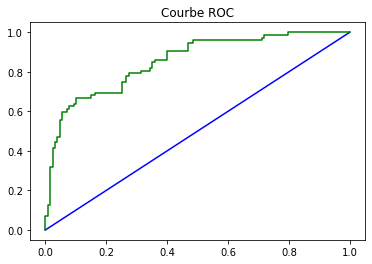

In [68]:
#importer le module metrics
#de la librairie scikit-learn
import sklearn.metrics as metrics
#colonnes pour les courbes ROC
#fpr (false positive rate -- taux de faux positifs) en abscisse
#tpr (true positive rate – taux de vrais positifs) en ordonnée
#pos_label = 1 pour indiquer la modalité cible
fprSm, tprSm, _ = metrics.roc_curve(yTest,predProbaSm,pos_label=1)
#graphique -- construire la diagonale de référence
#cas du modèle qui ne fait pas mieux que l’affectation des probabilités
#au hasard – notre courbe ne doit pas passer en dessous
#plus il s’en écarte vers le haut, mieux c’est
plt.plot(numpy.arange(0,1.1,0.1),numpy.arange(0,1.1,0.1),'b')
#rajouter notre diagramme
plt.plot(fprSm,tprSm,"g")
#titre
plt.title("Courbe ROC")
#faire apparaître le graphique
plt.show()

Pour calculer l’AUC (aire sous la courbe), nous faisons appel à la fonction roc_auc_score()

In [69]:
#valeur de l'AUC
aucSm = metrics.roc_auc_score(yTest,predProbaSm)
print("AUC : %.4f" % (aucSm))

AUC : 0.8529


# II- Régression logistique avec “scikit-learn”

La libraire « scikit-learn » est très populaire auprès des data scientists. 

Elle est très complète ; son mode opératoire est particulièrement cohérent, 
quelle que soit la famille de méthode de machine learning que nous
utilisons ; il est très facile d’enchaîner des opérations complexes, notamment avec le mécanisme des
« pipeline ». 

Voyons comment se comporte l’algorithme de régression logistique qu’elle propose.

## 1) Importation et vérification de version

Sage précaution toujours, nous affichons le numéro de version de la librairie.

In [70]:
#importation
import sklearn
#version
print(sklearn.__version__)

0.23.2


## 2) Régression logistique avec scikit-learn

Nous instancions une régression logistique sans pénalité c.-à-d. ni Ridge, ni Lasso. Nous lançons
l’estimation des paramètres avec la fonction fit() qui prend en entrée les données en apprentissage
avec la matrice des explicatives (il n’est pas nécessaire d’adjoindre la constante) et le vecteur des
classes observées.

In [71]:
#importation de la classe de calcul
from sklearn.linear_model import LogisticRegression
#instanciation
lrSk = LogisticRegression(penalty='none')
#lancement des calculs
#pas nécessaire de rajouter la constante
lrSk.fit(XTrain,yTrain)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [72]:
#affichage des coefficients
print(pandas.DataFrame({"var":XTrain.columns,"coef":lrSk.coef_[0]}))

         var      coef
0   pregnant  0.122988
1     plasma  0.024998
2  diastolic -0.025163
3    triceps -0.001375
4      serum -0.000404
5   bodymass  0.067111
6   pedigree  0.265359
7        age  0.008114
8      alea1 -2.077822
9      alea2 -0.829188


In [73]:
# Affichage de la constante :
print(lrSk.intercept_)

[-3.49965505]


Force est de constater qu’il y a eu un problème durant le processus d’apprentissage. 

Les coefficients estimés diffèrent sensiblement de ceux obtenus sous « statsmodels »

### a) Régression logistique sur données standardisées

La documentation de la régression logistique sous « scikit-learn » nous indique les différents
algorithmes d’optimisation qu’il est susceptible d’utiliser (option « solver »), qui sont pour la plupart
des succédanés de la descente du gradient. Ces approches, certains plus que d’autres, sont
sensibles aux différences d’échelles entre les variables, d’où l’indication « scale the data » dans le
« warning » envoyé par la méthode fit().


Dans ce qui suit, nous centrons et réduisons les données d’apprentissage avant de relancer la
modélisation.


In [74]:
#importation de l'outil
from sklearn import preprocessing
#instanciation
stds = preprocessing.StandardScaler()
#transformation
ZTrain = stds.fit_transform(XTrain)
print(scipy.stats.describe(ZTrain,axis=0,ddof=0))

DescribeResult(nobs=568, minmax=(array([-1.13103942, -3.72232402, -3.70291218, -1.31284418, -0.68471052,
       -4.15422422, -1.20987055, -1.03544449, -1.70981217, -1.78420532]), array([3.35938737, 2.40521662, 2.81830878, 4.90442497, 6.38329182,
       3.01297804, 5.89787709, 4.04415074, 1.76473061, 1.73794374])), mean=array([-1.25095552e-17,  1.31350330e-16,  3.71377420e-16,  1.25095552e-17,
       -2.50191104e-17, -3.07265950e-16, -3.06484103e-16, -1.89207023e-16,
        1.12585997e-16, -2.00152883e-16]), variance=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), skewness=array([ 0.90403569,  0.17163385, -1.8352426 ,  0.12232248,  2.36846201,
       -0.46474656,  1.9126523 ,  1.18020159,  0.04466256, -0.03653212]), kurtosis=array([ 0.10382287,  0.62481149,  5.44373725, -0.30612943,  7.58959687,
        2.58492601,  5.67541803,  0.79644501, -1.18644688, -1.14488371]))


Les variables sont bien de moyenne nulle et d’écart-type unitaire.
Nous instancions une nouvelle version de la régression et nous affichons les coefficients estimés.

In [75]:
#instanciation
lrSkStd = LogisticRegression(penalty='none')
#lancement des calculs -- pas nécessaire de rajouter la constante
lrSkStd.fit(ZTrain,yTrain)
#affichage des coefficients
print(pandas.DataFrame({"var":XTrain.columns,"coef":lrSkStd.coef_[0]}))

         var      coef
0   pregnant  0.316500
1     plasma  1.039883
2  diastolic -0.307838
3    triceps  0.047522
4      serum -0.111341
5   bodymass  0.726688
6   pedigree  0.250720
7        age  0.269074
8      alea1 -0.063863
9      alea2  0.108008


Pas de message d’erreur ou de warning intempestifs cette fois-ci. Mais les coefficients obtenus sont
très différents de ceux de « statsmodels » (page 6) puisque nous travaillons sur des données
transformées. 

Nous devons les « dé-standardiser » en les divisant par les écarts-type des variables.

In [76]:
#correction des coefficients - dé-standardisation
#par les écarts-type utilisés lors de la standardisation des variables
coefUnstd = lrSkStd.coef_[0] / stds.scale_
#affichage des coefficients corrigés
print(pandas.DataFrame({"var":XTrain.columns,"coef":coefUnstd}))

         var      coef
0   pregnant  0.094748
1     plasma  0.032181
2  diastolic -0.016455
3    triceps  0.002984
4      serum -0.000930
5   bodymass  0.094697
6   pedigree  0.791673
7        age  0.022780
8      alea1 -0.224136
9      alea2  0.381564


Maintenant seulement les paramètres estimés sont tout à fait cohérents. 

Note : Il y a quandmême de petites différences mais elles sont négligeables dans la mesure où une solution exacte
n’est pas possible de toute manière. 

Les heuristiques de calcul engendre une précision approximative que l’on peut piloter avec l’option « tol » 
(pour tolérance d’erreur).

Nous devons procéder de même avec la constante estimée de la régression mais, en sus des écartstype, les moyennes des 
variables entrent également dans le calcul.

In [77]:
#pour la constante, l'opération est plus complexe
interceptUnStd = lrSkStd.intercept_ + numpy.sum(lrSkStd.coef_[0]*(-stds.mean_/stds.scale_))
print(interceptUnStd)

[-8.19018088]


### b) Calcul de la log-vraisemblance

Les sorties de « scikit-learn » sont peu dissertes. Nous n’avons pas d’indications sur la valeur de
la log-vraisemblance à l’issue du processus d’optimisation. 

Dans cette section, nous la calculons explicitement à partir des classes observées et des probabilité d’appartenance 
aux classes fournies par la méthode predict_proba().

In [78]:
#probabilités d'affectation
proba01 = lrSkStd.predict_proba(ZTrain)
#affichage des 5 premières valeurs
print(proba01[:5,:])

[[0.27042793 0.72957207]
 [0.35296087 0.64703913]
 [0.43394476 0.56605524]
 [0.76161945 0.23838055]
 [0.90705449 0.09294551]]


Les probabilités sont sur deux colonnes. La première, n°0, pour l’appartenance à (Y = 0), la
seconde pour (Y = 1). 

Nous récupérons cette dernière.


In [79]:
#récupération de la colonne n°1
proba1 = proba01[:,1]
#description stat
print(scipy.stats.describe(proba1))

DescribeResult(nobs=568, minmax=(0.003367180639822714, 0.9757792363973964), mean=0.34507103917506676, variance=0.07056943685679869, skewness=0.7060045771178762, kurtosis=-0.7122546378569581)


Nous pouvons calculer la log-vraisemblance

In [80]:
#log-vraisemblance
log_likelihood = numpy.sum(yTrain*numpy.log(proba1)+(1.0-yTrain)*numpy.log(1.0-proba1))
print(log_likelihood)

-270.45852163242375


Encore une fois, nous sommes cohérents avec « statsmodels »

## 3) Performances prédictives en test

Pour appliquer le modèle sur l’échantillon test, il faut au préalable administrer la même
transformation (centrage, réduction) sur ce second dataset en utilisant les paramètres (moyennes,
écarts-type) calculés sur l’échantillon d’apprentissage.

In [81]:
#transformation de l'échantillon test
ZTest = stds.transform(XTest)
#stat. descriptives
print(scipy.stats.describe(ZTest,axis=0,ddof=0))

DescribeResult(nobs=200, minmax=(array([-1.13103942, -3.72232402, -3.70291218, -1.31284418, -0.68471052,
       -4.15422422, -1.14040344, -1.03544449, -1.73788928, -1.77007433]), array([3.95811094, 2.43616379, 2.17687721, 2.64359983, 3.85184417,
       4.58976253, 6.18521829, 3.28221146, 1.77174988, 1.69555078])), mean=array([ 0.07688538,  0.07303751, -0.03472539, -0.08885857, -0.06918443,
        0.05689804,  0.12991304,  0.00333274,  0.03026693, -0.13146248]), variance=array([1.05782456, 0.91065571, 1.26423059, 1.00305875, 0.71158337,
       1.2056961 , 1.34507102, 0.9614728 , 1.14899534, 0.9999305 ]), skewness=array([ 0.88464151,  0.19645013, -1.81317668,  0.07374474,  1.64418516,
       -0.36683607,  1.84434571,  0.96811782, -0.01251388,  0.10600105]), kurtosis=array([ 0.25025891,  0.62399596,  4.29171573, -1.15963716,  3.053313  ,
        4.46054942,  4.81083593,  0.1219992 , -1.33920178, -1.17954876]))


Les moyennes et écarts-type calculés ne sont pas forcément nuls et unitaires sur ce second
dataset transformé puisque les moyennes et écarts-type utilisées proviennent d’un autre
échantillon (d’apprentissage).

Nous appliquons le modèle (predict) et nous calculons la matrice de confusion avec la fonction
confusion_matrix() du module « metrics » de « scikit-learn ».

In [82]:
#appliquer la prédiction
predSk = lrSkStd.predict(ZTest)
print(numpy.unique(predSk,return_counts=True))
#matrice de confusion
print(metrics.confusion_matrix(yTest,predSk))

(array([0, 1], dtype=int64), array([139,  61], dtype=int64))
[[115  13]
 [ 24  48]]


Nous pouvons calculer individuellement les différents indicateurs mais, avec la fonction
classification_report(), nous disposons directement d’ un rapport détaillé.

In [83]:
#rapport sur la qualité de prédiction
print(metrics.classification_report(yTest,predSk))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       128
           1       0.79      0.67      0.72        72

    accuracy                           0.81       200
   macro avg       0.81      0.78      0.79       200
weighted avg       0.81      0.81      0.81       200



La matrice de confusion et, par conséquent, le taux de reconnaissance en test de 81%, sont
identiques à ceux de « statsmodels »

# Coclusion : 
 Les deux librairies étudiées, « statsmodels » et « scikitlearn », sont différentes dans leur philosophie et les fonctionnalités proposées. La première,
comme son nom l’indique, est empreinte d’une forte culture statistique. 

La seconde a une approche plutôt « machine learning ». Mais elles se rejoignent dans les résultats. C’est ce qui
importe en définitive.
